## Eigendecomposition of a stochastic matrix

We are looking at system like
$$
\dot{p} = M p
$$
where $M$ is a transition matrix with $M_{ii} = -\sum_{j\neq i} M_{ji}$

In [4]:
import numpy as np
M = np.array([[0, 0.1, 0.3, 0.2], [0.2, 0, 0.3, 0.4], [0.4, 0.3, 0, 0.2], [0.1, 0.3, 0.2, 0]])
for i in range(M.shape[0]):
    M[i, i] = -M[:,i].sum()
print(M)

[[-0.7  0.1  0.3  0.2]
 [ 0.2 -0.7  0.3  0.4]
 [ 0.4  0.3 -0.8  0.2]
 [ 0.1  0.3  0.2 -0.8]]


We want to express an initial condition $p_0$ in terms of right eigen vectors $v_i$ of $M$ as
$$
p_0 = \sum_i a_i v_i
$$
To this end, we use the fact that left $w_j$ and right $v_i$ eigenvectors are orthogonal, that is $w_j v_i = c_j \delta_{ij}$.


In [5]:
ev, rv = np.linalg.eig(M)
ev2, lv = np.linalg.eig(M.T)

print(ev)
print(rv)
print(lv)

for i in range(len(ev)):
    tmp = []
    for j in range(len(ev)):
        tmp.append(np.dot(lv[:,j], rv[:,i]))
    print(np.round(tmp,3))

[ 0.         -0.76972244 -1.13027756 -1.1       ]
[[ 4.33990837e-01  6.36953497e-01 -4.53212261e-01  4.08248290e-01]
 [ 5.91054188e-01 -4.88920332e-01 -1.96811297e-01  3.14698687e-15]
 [ 5.41455235e-01  3.40887167e-01  8.46834856e-01 -8.16496581e-01]
 [ 4.11257984e-01 -4.88920332e-01 -1.96811297e-01  4.08248290e-01]]
[[-0.5        -0.76034562  0.12221289  0.06375767]
 [-0.5         0.51041449  0.65236746 -0.63757671]
 [-0.5        -0.20850718 -0.28472945  0.06375767]
 [-0.5         0.34333125 -0.69167178  0.76509206]]
[-0.989  0.     0.    -0.   ]
[-0.    -0.973 -0.     0.   ]
[-0.     0.    -0.289 -0.   ]
[ 0.    -0.     0.     0.286]


We will determine the coefficients $a_i$ via
$$
w_j p_0 = w_j \sum_i a_i v_i = \sum_i a_i w_j v_i = a_j c_j \quad \Rightarrow a_j = \frac{w_j p_0}{c_j} = \frac{w_j p_0}{w_j v_j}
$$

In [7]:
def eigen_projection(p, lv, rv):
    return [np.dot(w,p)/np.dot(w,v) for w,v in zip(lv.T,rv.T)]

p = [0.5,0,.2,.30]
a = eigen_projection(p, lv, rv)
print(a)

reconstruction = np.sum([a[i]*v for i, v in enumerate(rv.T)], axis=0)
print(np.round(reconstruction, 3), p)


[0.5056229715393122, 0.32779217029422236, 0.7041583477198096, 0.9575278085425317]
[0.5 0.  0.2 0.3] [0.5, 0, 0.2, 0.3]


Time depending solution for $p$

$$
p(t) = \sum_i a_i e^{\lambda_i t} v_i
$$



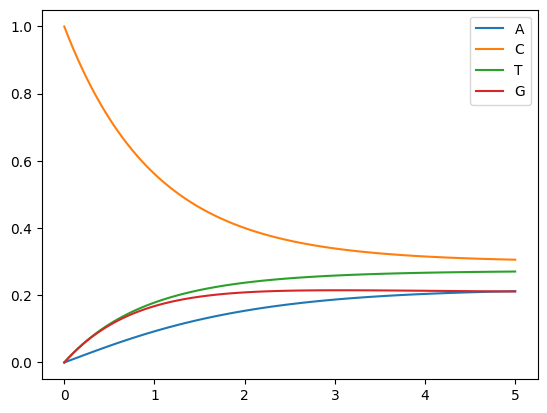

In [8]:
import matplotlib.pyplot as plt

def p_of_t(t, a, ev, rv):
    return np.sum([a[i]*np.exp(ev[i]*t)*v for i, v in enumerate(rv.T)], axis=0)

t = np.linspace(0, 5, 100)
p0 = [0,1,0,0]
a = eigen_projection(p0, lv, rv)
plt.plot(t, [p_of_t(ti, a, ev, rv) for ti in t])
plt.legend(["A","C","T","G"])